In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
df=pd.read_csv("../../datasets/House Price Prediction Dataset.csv",encoding="latin1")

In [83]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [84]:
df=df.drop(columns="Id")
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [85]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
df.shape

(2000, 9)

In [88]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [89]:
df["YearBuilt"]=pd.to_datetime(df["YearBuilt"])
df["YearBuilt"]=df["YearBuilt"].dt.year

In [90]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1970,Downtown,Excellent,No,424998
2,3592,2,2,3,1970,Downtown,Good,No,266746
3,966,4,2,2,1970,Suburban,Fair,Yes,244020
4,4926,1,4,2,1970,Downtown,Fair,Yes,636056


In [91]:
df["Location"].value_counts()



Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

In [92]:
df["Condition"].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

In [93]:
df["Garage"] = df["Garage"].map({"Yes": 1, "No": 0})


In [94]:
condition_map = {
    "Poor":1,
    "Fair": 2,
    "Good": 3,
    "Excellent": 4
}

df["Condition"] = df["Condition"].map(condition_map)


In [95]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)


In [96]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Rural,Location_Suburban,Location_Urban
0,1360,5,4,3,1970,4,0,149919,False,False,False
1,4272,5,4,3,1970,4,0,424998,False,False,False
2,3592,2,2,3,1970,3,0,266746,False,False,False
3,966,4,2,2,1970,2,1,244020,False,True,False
4,4926,1,4,2,1970,2,1,636056,False,False,False


In [97]:
df["YearsSinceBuilt"] = 2025 - df["YearBuilt"]


In [98]:
df=df.drop(columns="YearBuilt")

In [99]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,Price,Location_Rural,Location_Suburban,Location_Urban,YearsSinceBuilt
0,1360,5,4,3,4,0,149919,False,False,False,55
1,4272,5,4,3,4,0,424998,False,False,False,55
2,3592,2,2,3,3,0,266746,False,False,False,55
3,966,4,2,2,2,1,244020,False,True,False,55
4,4926,1,4,2,2,1,636056,False,False,False,55


In [100]:
price_temp=df["Price"]
price_temp.head()

0    149919
1    424998
2    266746
3    244020
4    636056
Name: Price, dtype: int64

In [101]:
df=df.drop(columns="Price")

In [102]:
df["House_Price"]=price_temp
df.head()

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,Location_Rural,Location_Suburban,Location_Urban,YearsSinceBuilt,House_Price
0,1360,5,4,3,4,0,False,False,False,55,149919
1,4272,5,4,3,4,0,False,False,False,55,424998
2,3592,2,2,3,3,0,False,False,False,55,266746
3,966,4,2,2,2,1,False,True,False,55,244020
4,4926,1,4,2,2,1,False,False,False,55,636056


In [103]:
df["YearsSinceBuilt"]=df["YearsSinceBuilt"]+1
df.head()

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,Location_Rural,Location_Suburban,Location_Urban,YearsSinceBuilt,House_Price
0,1360,5,4,3,4,0,False,False,False,56,149919
1,4272,5,4,3,4,0,False,False,False,56,424998
2,3592,2,2,3,3,0,False,False,False,56,266746
3,966,4,2,2,2,1,False,True,False,56,244020
4,4926,1,4,2,2,1,False,False,False,56,636056


In [104]:
corr_matrix = df.corr()
corr_matrix


,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,Location_Rural,Location_Suburban,Location_Urban,YearsSinceBuilt,House_Price
Area,1.000000,0.047523,0.021881,0.017749,-0.006540,-0.003441,-0.017328,0.003404,0.000010,NaN,0.001542
Bedrooms,0.047523,1.000000,-0.011990,0.010435,-0.011042,-0.041713,-0.011276,-0.010409,0.025640,NaN,-0.003471
Bathrooms,0.021881,-0.011990,1.000000,0.029089,-0.000497,0.004057,-0.020028,-0.000904,-0.007326,NaN,-0.015737
Floors,0.017749,0.010435,0.029089,1.000000,-0.020121,-0.004635,-0.007149,-0.009907,0.014640,NaN,0.055890
Condition,-0.006540,-0.011042,-0.000497,-0.020121,1.000000,-0.037733,-0.013901,-0.003843,-0.021426,NaN,-0.010576
Garage,-0.003441,-0.041713,0.004057,-0.004635,-0.037733,1.000000,0.028254,0.027303,-0.010005,NaN,0.002842
Location_Rural,-0.017328,-0.011276,-0.020028,-0.007149,-0.013901,0.028254,1.000000,-0.314480,-0.315338,NaN,0.001890
Location_Suburban,0.003404,-0.010409,-0.000904,-0.009907,-0.003843,0.027303,-0.314480,1.000000,-0.319261,NaN,0.040303
Location_Urban,0.000010,0.025640,-0.007326,0.014640,-0.021426,-0.010005,-0.315338,-0.319261,1.000000,NaN,-0.038312
YearsSinceBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


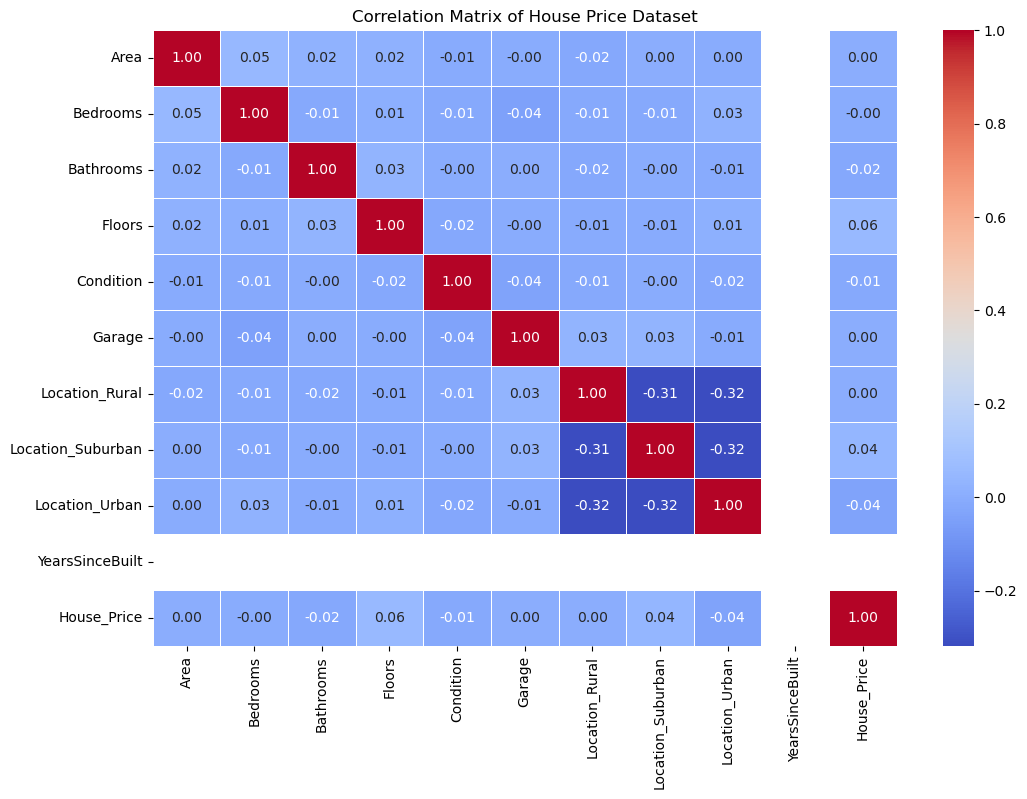

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of House Price Dataset")
plt.show()


In [106]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [107]:
X=df.drop(columns="House_Price")
y=df["House_Price"]
# print(X.head())
print(y.head())

0    149919
1    424998
2    266746
3    244020
4    636056
Name: House_Price, dtype: int64


In [108]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.10147065,  1.40179052,  1.30556821, ..., -0.56426196,
        -0.5658021 ,  0.        ],
       [ 1.14748543,  1.40179052,  1.30556821, ..., -0.56426196,
        -0.5658021 ,  0.        ],
       [ 0.62231712, -0.70458141, -0.49832569, ..., -0.56426196,
        -0.5658021 ,  0.        ],
       ...,
       [-1.33161794,  1.40179052, -1.40027264, ..., -0.56426196,
        -0.5658021 ,  0.        ],
       [ 0.9853011 , -0.00245743, -1.40027264, ..., -0.56426196,
         1.76740243,  0.        ],
       [ 0.15661639,  1.40179052, -1.40027264, ...,  1.77222649,
        -0.5658021 ,  0.        ]])

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=12)

In [110]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
class ModelTrainer:
    def __init__(self, model_type="linear", tune=False):
        self.model_type = model_type
        self.tune = tune
        self.model = None

    def _get_model(self):
        if self.model_type == "linear":
            return LinearRegression()
        elif self.model_type == "ridge":
            return Ridge()
        elif self.model_type == "lasso":
            return Lasso()
        else:
            raise ValueError("Invalid model type")

    def train(self, X_train, y_train):
        base_model = self._get_model()

        if self.tune and self.model_type != "linear":

            param_grid = {
    "alpha": [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
}


            grid = GridSearchCV(
                base_model,
                param_grid,
                cv=5,
                scoring="r2"
            )

            grid.fit(X_train, y_train)
            self.model = grid.best_estimator_

        else:
            self.model = base_model
            self.model.fit(X_train, y_train)

        return self.model


In [112]:
class ModelTester:
    def __init__(self, model):
        self.model = model

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)

        return {
            "R2": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
        }


In [ ]:
model_list = ["linear", "ridge", "lasso"]


trained_models = {}
all_metrics = {}

print("--- Starting Model Training and Testing ---")

for m_type in model_list:

    is_tuned = True if m_type != "linear" else False
    trainer = ModelTrainer(model_type=m_type, tune=is_tuned)
    

    model_obj = trainer.train(X_train, y_train)
    trained_models[m_type] = model_obj
    

    tester = ModelTester(model_obj)
    metrics = tester.evaluate(X_test, y_test)
    

    all_metrics[m_type] = metrics
    
    print(f"Completed: {m_type.upper()}")

print("\nAll models have been processed.")

--- Starting Model Training and Testing ---
Completed: LINEAR
Completed: RIDGE
Completed: LASSO

All models have been processed.


In [ ]:
results_comparison = pd.DataFrame(all_metrics).T

print("--- Performance Metrics Comparison ---")
display(results_comparison)


best_model_name = results_comparison['R2'].idxmax()
print(f"\nBest Performing Model: {best_model_name.upper()} with R2 = {results_comparison.loc[best_model_name, 'R2']:.4f}")

--- Performance Metrics Comparison ---


,R2,MSE,RMSE
linear,-0.001812,7.341281e+10,270947.977972
ridge,-0.001812,7.341280e+10,270947.970470
lasso,-0.001812,7.341281e+10,270947.975742



Best Performing Model: RIDGE with R2 = -0.0018


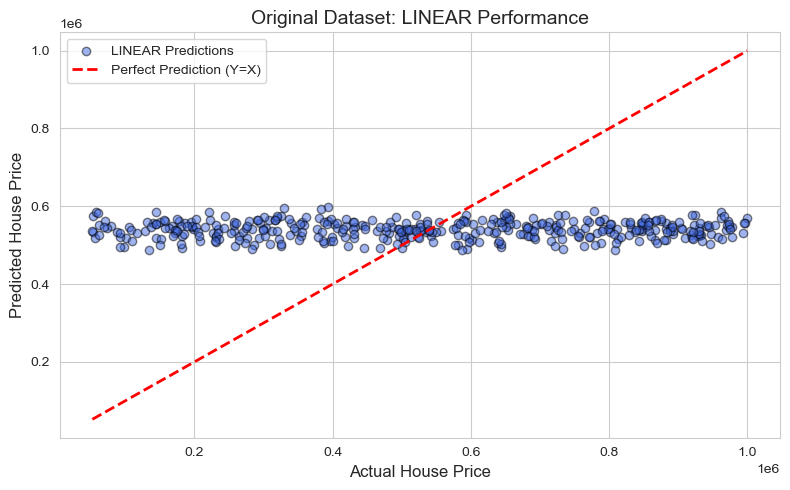

Generated Plot for: LINEAR


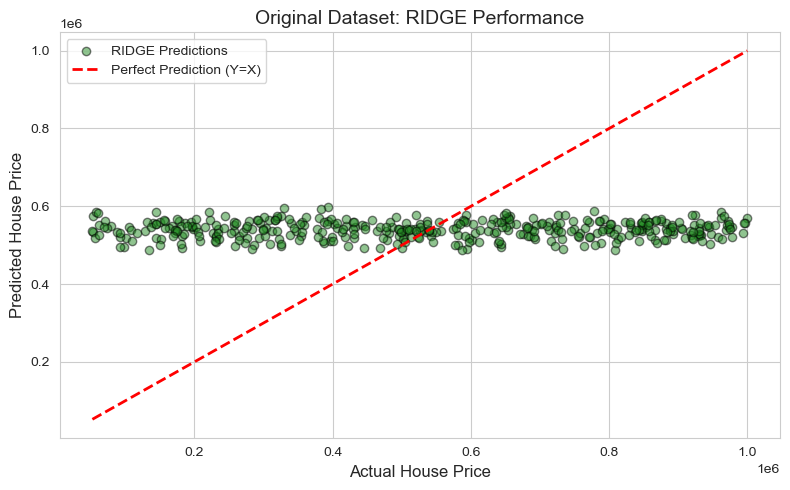

Generated Plot for: RIDGE


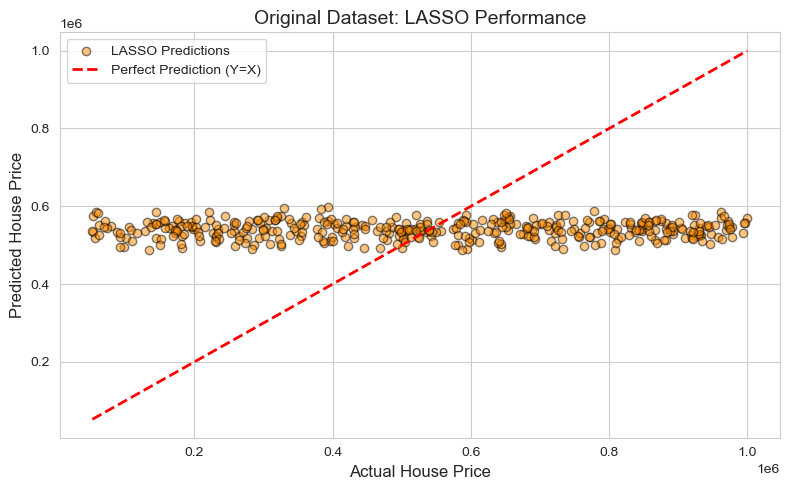

Generated Plot for: LASSO


In [ ]:
sns.set_style("whitegrid")
model_names = ["linear", "ridge", "lasso"]
colors = ['royalblue', 'forestgreen', 'darkorange']

for i, name in enumerate(model_names):
    plt.figure(figsize=(8, 5))
    

    current_model = trained_models[name]
    y_pred_current = current_model.predict(X_test)
    
    plt.scatter(y_test, y_pred_current, alpha=0.5, color=colors[i], edgecolors='k', label=f'{name.upper()} Predictions')
    
    line_coords = [y_test.min(), y_test.max()]
    plt.plot(line_coords, line_coords, 'r--', lw=2, label='Perfect Prediction (Y=X)')
    

    plt.title(f'Original Dataset: {name.upper()} Performance', fontsize=14)
    plt.xlabel('Actual House Price', fontsize=12)
    plt.ylabel('Predicted House Price', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Generated Plot for: {name.upper()}")